Data is from https://www.kaggle.com/pearlveera/weekly-sku-level-product-sales-transactions

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the data, clean it up

In [2]:
df = pd.read_csv("Productlevel_Sales_Transactions_Dataset_Weekly.csv")

In [17]:
df

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk94,Wk95,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103
0,Store1,SKU1,$24.00,23,48,47,42,22,29,47,...,31,37,33,40,125,133,229,381,21,31
1,Store1,SKU2,$63.00,23,22,25,40,32,26,30,...,20,20,25,50,75,95,231,590,25,33
2,Store1,SKU3,$93.00,7,11,8,9,10,8,7,...,9,17,13,30,67,188,267,330,35,33
3,Store1,SKU4,$48.00,50,31,50,33,26,27,42,...,31,23,26,23,92,126,205,357,30,34
4,Store1,SKU5,$62.00,8,5,13,11,6,7,9,...,19,9,15,21,93,243,710,1872,33,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Store5,SKU1809,$71.00,31,47,36,42,47,44,34,...,43,22,47,30,85,224,383,490,24,39
5996,Store5,SKU1563,$64.00,29,24,46,32,47,26,35,...,21,33,34,27,87,167,308,796,26,24
5997,Store5,SKU897,$77.00,44,43,31,35,31,22,36,...,43,39,29,35,83,137,368,499,34,28
5998,Store5,SKU1142,$81.00,38,41,21,44,45,26,23,...,20,25,20,28,112,334,572,1427,41,31


In [5]:
df.describe()

,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,Wk9,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,Unnamed: 107,94
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,0.0,0.0
mean,41.134833,41.251167,41.105500,40.873667,41.237000,41.094667,41.273833,40.926000,40.991333,41.211500,...,42.284333,42.006167,128.485833,257.526833,516.523000,1037.416500,42.507833,42.497667,NaN,NaN
std,24.747439,24.479759,24.387425,24.530777,24.486175,24.520024,24.445629,24.246646,24.347246,24.534902,...,23.123277,23.021514,63.388191,151.850032,352.988922,800.883155,23.046174,22.922534,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,33.000000,39.000000,45.000000,71.000000,0.000000,0.000000,NaN,NaN
25%,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,26.000000,26.000000,81.000000,148.750000,265.000000,481.000000,26.000000,26.000000,NaN,NaN
50%,38.000000,39.000000,38.000000,38.000000,39.000000,38.000000,39.000000,38.000000,38.000000,39.000000,...,38.000000,38.000000,115.000000,219.000000,422.000000,816.000000,38.000000,39.000000,NaN,NaN
75%,53.000000,53.000000,53.000000,52.000000,53.000000,53.000000,54.000000,53.000000,52.250000,53.000000,...,52.000000,52.000000,150.000000,328.000000,664.000000,1331.250000,53.000000,53.000000,NaN,NaN
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,300.000000,888.000000,2609.000000,6605.000000,100.000000,100.000000,NaN,NaN


what are these columns?

In [8]:
df['Unnamed: 107'].min(), df['Unnamed: 107'].max()

(nan, nan)

In [9]:
df['94'].min(), df['94'].max()

(nan, nan)

apparently nothing. So I will drop them.

In [10]:
df.drop(columns = ['Unnamed: 107', '94'], inplace=True)

Doing a general check of the other columns

In [23]:
df.dtypes

Scode    object
Pcode    object
Price    object
Wk0       int64
Wk1       int64
          ...  
Wk99      int64
Wk100     int64
Wk101     int64
Wk102     int64
Wk103     int64
Length: 107, dtype: object

In [25]:
df.Scode.unique()

array(['Store1', 'Store2', 'Store3', 'Store4', 'Store5'], dtype=object)

In [26]:
df.Pcode.unique()

array(['SKU1', 'SKU2', 'SKU3', ..., 'SKU2020', 'SKU1183', 'SKU1563'],
      dtype=object)

The prefixes are annoying, so let's clean them up.

In [29]:
def reformat_objects_to_num(obj, part_to_drop, dtype):
    """for simplicity, this assumes the part to drop is at the beginning of the object
    dtype is int or float"""
    num = obj.split(part_to_drop)[1]
    if dtype=='int':
        num = int(num)
    elif dtype=='float':
        num = float(num)
    return num

In [32]:
df['sku'] = df['Pcode'].apply(lambda x: reformat_objects_to_num(x, 'SKU', 'int'))

In [34]:
df['item_price'] = df['Price'].apply(lambda x: reformat_objects_to_num(x, '$', 'float'))

In [35]:
df.head()

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,sku,item_price
0,Store1,SKU1,$24.00,23,48,47,42,22,29,47,...,33,40,125,133,229,381,21,31,1,24.0
1,Store1,SKU2,$63.00,23,22,25,40,32,26,30,...,25,50,75,95,231,590,25,33,2,63.0
2,Store1,SKU3,$93.00,7,11,8,9,10,8,7,...,13,30,67,188,267,330,35,33,3,93.0
3,Store1,SKU4,$48.00,50,31,50,33,26,27,42,...,26,23,92,126,205,357,30,34,4,48.0
4,Store1,SKU5,$62.00,8,5,13,11,6,7,9,...,15,21,93,243,710,1872,33,10,5,62.0


#### Plot some things

Trying to see if there's some observable patters in the pirces of the different items but this ended up being very messy.

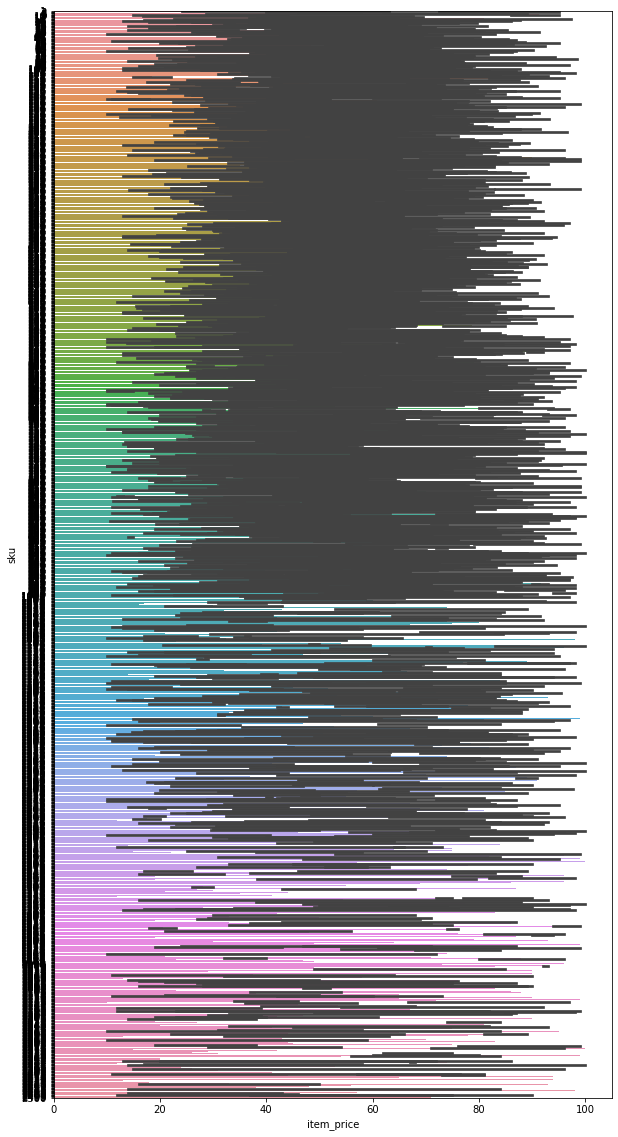

In [39]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.barplot(data=df, y='sku', x='item_price',
           orient='h')
plt.show()

In [40]:
store1 = df[df.Scode=='Store1']

In [43]:
#make a list to more easily filter out the relevant columns
weeks = [col for col in df.columns if 'Wk' in col]

In [59]:
by_store = df.groupby('Scode').mean()[weeks]
by_store

,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,Wk9,...,Wk94,Wk95,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103
Scode,,,,,,,,,,,,,,,,,,,,,
Store1,17.159000,17.322,17.547000,17.836000,17.781000,17.515000,17.718000,17.710000,17.774,17.691000,...,24.562000,24.652000,24.366000,23.859,76.866000,151.122000,299.396000,600.418000,24.390000,24.137000
Store2,49.898000,50.364,50.640000,48.878000,49.947000,50.418000,51.577000,48.888000,49.045,51.284000,...,49.978000,49.036000,48.632000,48.872,194.513000,392.988000,794.809000,1606.515000,51.055000,50.444000
Store3,74.500000,74.278,74.104000,74.022000,74.347000,74.074000,74.173000,73.905000,74.378,74.171000,...,74.376000,74.443000,75.080000,74.270,197.236000,391.936000,784.829000,1574.098000,74.522000,73.974000
Store4,34.985333,34.946,34.639333,34.923333,34.960000,34.715333,34.968667,34.565333,34.896,34.522667,...,35.128667,34.986000,35.045333,34.572,100.490000,202.061333,404.340667,809.655333,34.639333,35.576667
Store5,35.182667,35.416,34.922000,34.747333,35.271333,34.992000,34.481333,35.470000,34.938,34.892667,...,35.217333,34.751333,35.373333,35.452,101.043333,204.015333,409.062000,819.323333,35.414000,35.377333


Plot some things by store

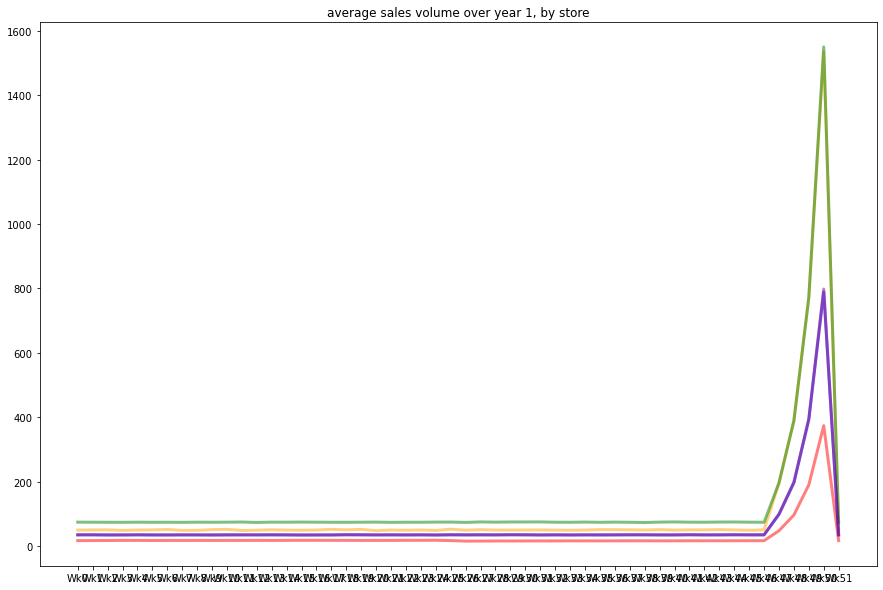

In [71]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(by_store.loc['Store1', weeks[:52]], lw=3, alpha=.5, color='red')
plt.plot(by_store.loc['Store2', weeks[:52]], lw=3, alpha=.5, color='orange')
plt.plot(by_store.loc['Store3', weeks[:52]], lw=3, alpha=.5, color='green')
plt.plot(by_store.loc['Store4', weeks[:52]], lw=3, alpha=.5, color='blue')
plt.plot(by_store.loc['Store5', weeks[:52]], lw=3, alpha=.5, color='purple')

plt.title('average sales volume over year 1, by store')
plt.show()

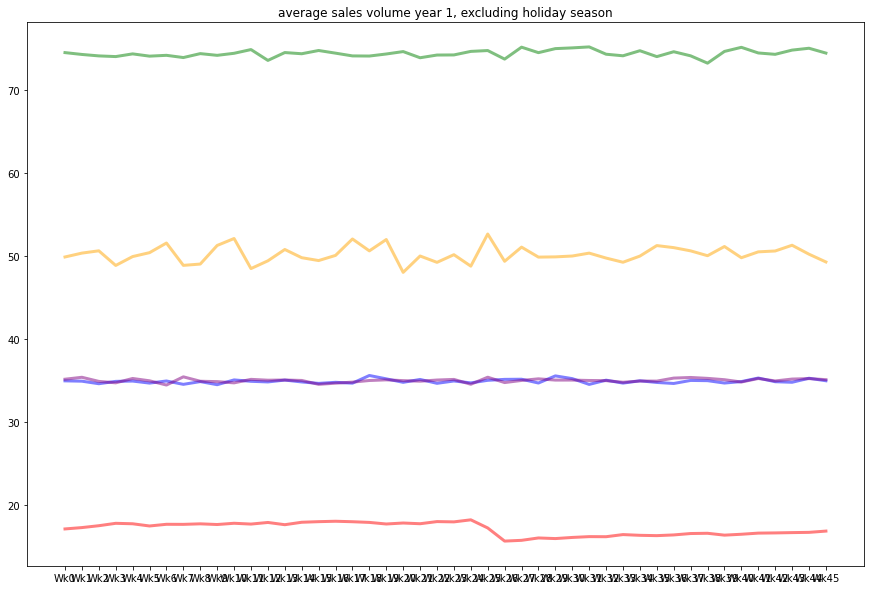

In [72]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(by_store.loc['Store1', weeks[:46]], lw=3, alpha=.5, color='red')
plt.plot(by_store.loc['Store2', weeks[:46]], lw=3, alpha=.5, color='orange')
plt.plot(by_store.loc['Store3', weeks[:46]], lw=3, alpha=.5, color='green')
plt.plot(by_store.loc['Store4', weeks[:46]], lw=3, alpha=.5, color='blue')
plt.plot(by_store.loc['Store5', weeks[:46]], lw=3, alpha=.5, color='purple')

plt.title('average sales volume year 1, excluding holiday season')
plt.show()

Seperate out the data by year.

In [138]:
yr1_no_hol = df[['sku', 'Scode'] + weeks[:46]]

In [139]:
yr1_no_hol['means'] = yr1_no_hol.drop(columns='sku').mean(axis=1)

<ipython-input-139-2bc40aa3c0d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr1_no_hol['means'] = yr1_no_hol.drop(columns='sku').mean(axis=1)


In [141]:
yr2_no_hol = df[['sku', 'Scode'] + weeks[52:98]]
yr2_no_hol['means'] = yr2_no_hol.drop(columns='sku').mean(axis=1)

<ipython-input-141-548b29b88bef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr2_no_hol['means'] = yr2_no_hol.drop(columns='sku').mean(axis=1)


In [140]:
yr1_no_hol.sort_values('means', ascending=False).head(15)

,sku,Scode,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,...,Wk37,Wk38,Wk39,Wk40,Wk41,Wk42,Wk43,Wk44,Wk45,means
2531,484,Store3,78,97,87,99,94,97,89,59,...,85,78,65,76,72,94,84,89,53,82.282609
2379,134,Store3,93,82,71,88,87,95,98,93,...,98,95,64,95,63,97,95,96,84,81.326087
2139,201,Store3,70,73,81,89,99,68,99,90,...,62,92,95,50,86,73,54,51,100,81.217391
2227,181,Store3,86,73,84,80,100,68,88,64,...,99,68,80,80,94,69,66,99,80,81.065217
2689,130,Store3,81,85,58,79,87,98,69,93,...,62,71,94,96,81,88,54,92,86,80.847826
2644,164,Store3,83,98,90,90,83,88,54,61,...,91,79,63,98,66,99,81,98,96,80.739130
2283,110,Store3,89,62,87,91,85,86,88,86,...,50,75,79,85,58,76,88,82,74,80.652174
2952,433,Store3,96,100,50,82,67,94,87,69,...,70,61,63,68,96,100,99,81,83,79.934783
2067,369,Store3,75,70,89,84,86,76,50,82,...,83,79,96,97,61,90,93,80,87,79.913043
2373,309,Store3,74,56,56,96,97,95,50,66,...,95,95,97,77,73,92,94,73,94,79.782609


In [137]:
yr1_no_hol.groupby('sku').mean().sort_values('means')

,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,Wk9,...,Wk37,Wk38,Wk39,Wk40,Wk41,Wk42,Wk43,Wk44,Wk45,means
sku,,,,,,,,,,,,,,,,,,,,,
735,24.500000,14.500000,9.500000,9.500000,1.000000,32.000000,32.500000,1.000000,47.000000,35.500000,...,4.000000,14.500000,22.000000,23.500000,40.000000,12.000000,11.500000,2.5,29.500000,21.293478
707,45.500000,23.000000,35.000000,14.500000,40.500000,14.000000,17.000000,44.500000,22.500000,47.500000,...,9.500000,39.500000,10.000000,26.000000,8.000000,0.500000,10.500000,21.0,46.500000,21.630435
665,2.000000,10.000000,45.000000,19.000000,41.500000,9.000000,35.500000,14.500000,41.000000,20.500000,...,29.000000,21.500000,18.000000,32.000000,29.500000,35.000000,13.500000,23.5,19.500000,22.097826
700,22.500000,48.500000,2.000000,41.000000,50.000000,7.000000,8.000000,18.500000,46.000000,16.000000,...,26.500000,11.000000,11.500000,5.000000,40.500000,29.000000,29.500000,25.5,12.000000,22.413043
721,24.000000,27.000000,25.000000,30.500000,26.000000,8.500000,32.500000,2.000000,30.000000,34.500000,...,40.500000,20.500000,26.000000,8.000000,19.500000,2.000000,36.000000,30.0,26.000000,22.989130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,63.857143,63.571429,56.285714,64.428571,73.142857,58.714286,44.714286,52.857143,69.285714,60.714286,...,59.142857,58.428571,76.142857,63.571429,63.714286,63.571429,48.714286,66.0,65.857143,62.239130
133,59.000000,72.200000,44.200000,63.200000,51.800000,70.800000,78.600000,64.200000,62.200000,65.000000,...,55.200000,70.800000,78.200000,71.000000,52.000000,71.400000,64.600000,60.2,65.000000,64.004348
129,70.142857,62.571429,70.857143,65.714286,64.285714,68.000000,62.714286,73.000000,64.714286,74.285714,...,75.000000,61.000000,75.285714,75.571429,56.428571,68.428571,72.000000,74.0,70.428571,64.888199


look at the top and bottom 5 items by sales volume

In [158]:
top_5 = yr2_no_hol.groupby('sku').mean().sort_values('means')[-5:].index
bottom_5 = yr2_no_hol.groupby('sku').mean().sort_values('means')[:5].index

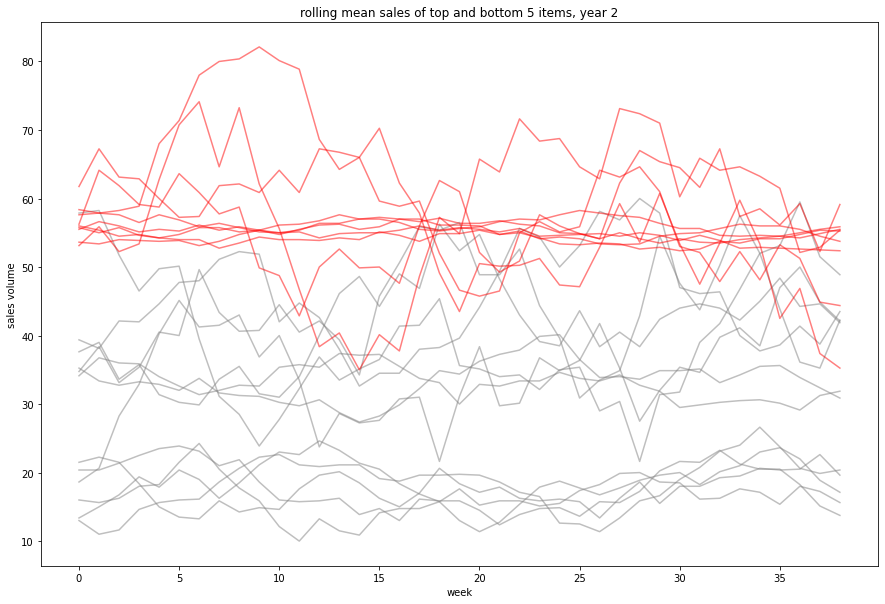

In [561]:
bottom_rolling_means = df[df.sku.isin(bottom_5)][weeks[52:98]].rolling(8, axis=1).mean().dropna(axis=1).values
top_rolling_means = df[df.sku.isin(top_5)][weeks[52:98]].rolling(8, axis=1).mean().dropna(axis=1).values

fig, ax = plt.subplots(figsize=(15,10))

for n, row in enumerate(bottom_rolling_means):
    plt.plot(range(len(row)), row, color='gray', alpha=.5)
    
for n, row in enumerate(top_rolling_means):
    plt.plot(range(len(row)), row, color='red', alpha=.5)
    
plt.title('rolling mean sales of top and bottom 5 items, year 2')
plt.ylabel('sales volume')
plt.xlabel('week')
plt.show()

In [190]:
top_5_df = df[df.sku.isin(top_5)][['Scode' ,'sku'] + weeks[52:98]]
top_5_df['means'] = top_5_df.drop(columns=['Scode', 'sku']).mean(axis=1)

In [192]:
top_5_df.sort_values('means', ascending=False)

,Scode,sku,Wk52,Wk53,Wk54,Wk55,Wk56,Wk57,Wk58,Wk59,...,Wk89,Wk90,Wk91,Wk92,Wk93,Wk94,Wk95,Wk96,Wk97,means
2312,Store3,298,88,62,70,73,100,83,96,82,...,62,79,96,87,79,81,81,77,97,81.391304
2244,Store3,12,69,99,67,98,64,97,50,81,...,67,71,75,84,93,90,100,92,55,80.652174
2549,Store3,294,65,95,75,96,73,97,65,72,...,92,84,67,56,91,67,98,86,91,79.152174
2460,Store3,353,79,63,52,92,80,96,86,56,...,81,87,88,87,86,66,96,85,94,79.000000
2809,Store3,129,89,79,94,98,74,90,91,80,...,75,85,56,100,66,99,94,92,71,78.565217
2556,Store3,294,73,77,80,66,80,55,98,88,...,96,93,94,82,55,76,80,92,99,78.000000
2810,Store3,12,88,74,96,82,69,84,87,57,...,82,93,76,99,68,61,87,50,67,77.413043
2319,Store3,298,85,97,97,74,90,52,80,97,...,74,69,53,82,83,81,100,84,82,77.108696
2980,Store3,12,83,60,67,60,98,64,78,88,...,93,60,56,100,75,61,94,70,63,76.630435
2855,Store3,12,62,58,55,76,77,65,92,85,...,75,82,51,78,86,89,83,96,98,75.934783


#### Noticed a disrepancy

there's something wrong with store 3's data. Why is it dominating the top5 SKU dataframe?

In [201]:
store1.shape, store2.shape, store3.shape, store4.shape, store5.shape

((1000, 109), (1000, 109), (1000, 109), (1500, 109), (1500, 109))

In [217]:
print("total unique SKUs:", len(df.sku.unique()))
print("number unique SKUs in store 1:", len(store1.sku.unique()))
print("number unique SKUs in store 3:", len(store3.sku.unique()))

total unique SKUs: 1855
number unique SKUs in store 1: 1000
number unique SKUs in store 3: 426


Aha. There are duplicated SKUs in store 3's dataframe. What about the other 3 stores?

In [218]:
print("number unique SKUs in store 2:", len(store2.sku.unique()))
print("number unique SKUs in store 4:", len(store4.sku.unique()))
print("number unique SKUs in store 5:", len(store5.sku.unique()))

number unique SKUs in store 2: 1000
number unique SKUs in store 4: 936
number unique SKUs in store 5: 1136


Stores 4 and 5 also look problematic, as they should each have 1500 unique entries. 

Almost half the SKUs in store 3 are duplicated, but their prices are very different. 

In [220]:
store3[store3.duplicated(subset=['sku'], keep=False)].sort_values('sku')

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,sku,item_price
2973,Store3,SKU1,$14.00,72,82,90,53,80,74,91,...,72,83,117,299,760,1318,57,69,1,14.0
2627,Store3,SKU1,$50.00,83,71,75,80,87,87,96,...,52,80,281,359,629,875,69,85,1,50.0
2621,Store3,SKU3,$67.00,87,91,87,54,62,70,77,...,83,64,122,128,131,290,84,81,3,67.0
2606,Store3,SKU3,$97.00,68,77,75,81,91,68,59,...,91,92,240,313,744,1851,87,56,3,97.0
2758,Store3,SKU9,$21.00,52,87,64,53,79,70,73,...,90,75,143,297,810,884,57,52,9,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,Store3,SKU496,$73.00,90,81,84,92,87,55,77,...,53,61,222,251,431,1026,60,69,496,73.0
2307,Store3,SKU499,$88.00,93,53,51,64,59,87,100,...,76,73,154,358,958,1469,63,69,499,88.0
2837,Store3,SKU499,$11.00,80,72,96,81,54,63,68,...,78,54,179,240,622,965,72,64,499,11.0
2062,Store3,SKU500,$25.00,63,72,77,99,68,52,95,...,70,74,110,246,710,1395,75,78,500,25.0


on top of that, there are some that have the same price listed, but different weekly sales data

In [219]:
store3[store3.duplicated(subset=['sku', 'item_price'], keep=False)].sort_values('sku')

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,sku,item_price
2678,Store3,SKU239,$15.00,53,69,81,100,56,50,91,...,57,98,146,293,548,843,80,60,239,15.0
2896,Store3,SKU239,$15.00,63,57,53,62,58,60,79,...,91,88,188,498,1162,1991,57,99,239,15.0
2936,Store3,SKU277,$97.00,79,89,65,67,66,95,63,...,95,94,173,491,1034,2302,57,67,277,97.0
2984,Store3,SKU277,$97.00,74,78,50,77,50,91,96,...,86,53,135,239,576,1455,51,60,277,97.0
2097,Store3,SKU288,$35.00,93,71,82,56,53,75,88,...,50,64,287,312,907,1799,91,59,288,35.0
2339,Store3,SKU288,$35.00,64,66,50,84,53,83,84,...,82,63,105,214,615,899,87,89,288,35.0
2223,Store3,SKU315,$67.00,90,98,60,98,53,89,78,...,92,77,167,298,882,1977,92,50,315,67.0
2370,Store3,SKU315,$67.00,52,65,97,87,58,84,54,...,84,73,260,507,1195,3535,86,85,315,67.0
2280,Store3,SKU321,$87.00,65,67,93,53,84,79,90,...,99,60,207,459,507,980,65,67,321,87.0
2883,Store3,SKU321,$87.00,51,99,59,66,95,66,58,...,51,64,147,395,683,1717,63,57,321,87.0


looking at store 4

In [221]:
store4[store4.duplicated(subset=['sku'], keep=False)].sort_values('sku')

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,sku,item_price
3218,Store4,SKU1,$19.00,28,25,35,43,30,39,24,...,25,36,147,436,793,1343,37,35,1,19.0
3203,Store4,SKU1,$41.00,49,38,43,32,44,31,43,...,31,38,81,160,172,484,39,28,1,41.0
4225,Store4,SKU1,$20.00,20,35,34,39,25,29,47,...,32,50,138,150,351,589,42,43,1,20.0
3839,Store4,SKU24,$11.00,28,45,38,43,41,44,50,...,46,40,78,179,343,374,45,30,24,11.0
4209,Store4,SKU24,$56.00,50,25,32,37,22,29,40,...,30,34,64,78,149,345,39,27,24,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,Store4,SKU1494,$37.00,21,45,35,26,27,24,36,...,43,25,100,159,374,790,26,45,1494,37.0
4450,Store4,SKU1494,$50.00,45,37,50,23,29,47,34,...,35,40,118,190,339,794,45,33,1494,50.0
3793,Store4,SKU1494,$26.00,30,44,35,21,37,35,41,...,36,34,64,155,306,901,35,46,1494,26.0
3657,Store4,SKU1495,$99.00,50,32,26,50,20,36,34,...,28,34,132,342,592,1069,36,20,1495,99.0


In [222]:
store4[store4.duplicated(subset=['sku', 'item_price'], keep=False)].sort_values('sku')

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,sku,item_price
4298,Store4,SKU37,$17.00,38,27,45,36,31,29,37,...,48,44,99,126,204,506,33,30,37,17.0
3624,Store4,SKU37,$17.00,33,21,37,20,43,39,20,...,20,49,120,130,138,236,32,30,37,17.0
3299,Store4,SKU172,$99.00,24,21,41,48,50,21,20,...,38,27,52,74,177,467,49,30,172,99.0
4148,Store4,SKU172,$99.00,43,21,26,31,29,41,20,...,25,44,57,125,339,506,49,48,172,99.0
4189,Store4,SKU295,$16.00,22,25,49,47,34,33,50,...,37,46,93,208,407,1218,37,48,295,16.0
4435,Store4,SKU295,$16.00,34,41,39,29,49,50,32,...,47,22,114,195,535,1547,35,21,295,16.0
3189,Store4,SKU324,$31.00,38,20,50,29,40,45,36,...,37,29,77,229,440,693,37,36,324,31.0
3509,Store4,SKU324,$31.00,38,27,21,25,20,27,46,...,22,20,117,225,405,740,47,35,324,31.0
3307,Store4,SKU462,$22.00,45,23,49,36,21,30,42,...,38,37,63,187,412,505,50,24,462,22.0
3905,Store4,SKU462,$22.00,24,36,32,48,49,46,35,...,35,48,146,302,681,2033,43,28,462,22.0


looking at store 5

In [223]:
store5[store5.duplicated(subset=['sku'], keep=False)].sort_values('sku')

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,sku,item_price
5420,Store5,SKU22,$16.00,50,43,38,38,48,31,22,...,21,44,134,304,797,1958,44,21,22,16.0
5080,Store5,SKU22,$36.00,49,38,34,42,21,36,40,...,48,44,104,150,370,814,41,40,22,36.0
5409,Store5,SKU23,$75.00,41,30,47,32,32,47,27,...,25,43,135,289,849,2366,35,35,23,75.0
4619,Store5,SKU23,$78.00,23,25,31,22,38,31,23,...,31,44,64,68,172,237,24,22,23,78.0
5659,Store5,SKU30,$19.00,37,42,40,40,31,21,20,...,35,49,55,123,221,546,46,36,30,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5757,Store5,SKU2488,$90.00,42,31,27,28,41,24,27,...,42,41,58,78,150,205,45,33,2488,90.0
5051,Store5,SKU2488,$37.00,47,46,34,20,42,28,35,...,22,30,58,143,309,674,43,25,2488,37.0
4600,Store5,SKU2490,$54.00,48,38,36,23,35,27,38,...,22,35,66,150,278,592,21,33,2490,54.0
5418,Store5,SKU2490,$12.00,24,38,50,30,34,47,49,...,24,28,104,163,216,545,35,22,2490,12.0


In [224]:
store5[store5.duplicated(subset=['sku', 'item_price'], keep=False)].sort_values('sku')

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,sku,item_price
5285,Store5,SKU30,$19.00,27,49,34,21,34,25,22,...,23,29,99,256,282,559,38,41,30,19.0
5659,Store5,SKU30,$19.00,37,42,40,40,31,21,20,...,35,49,55,123,221,546,46,36,30,19.0
5334,Store5,SKU146,$88.00,45,21,40,38,31,23,43,...,46,33,52,113,202,482,40,20,146,88.0
5823,Store5,SKU146,$88.00,43,30,36,34,23,32,23,...,40,30,84,120,273,783,32,41,146,88.0
5426,Store5,SKU839,$10.00,48,20,47,28,29,21,40,...,30,36,89,263,402,597,45,32,839,10.0
5830,Store5,SKU839,$10.00,42,30,33,37,47,31,32,...,20,29,92,185,340,646,46,41,839,10.0
5117,Store5,SKU1406,$99.00,40,30,36,35,44,38,28,...,31,39,85,109,314,630,39,35,1406,99.0
5442,Store5,SKU1406,$99.00,38,31,43,27,49,41,38,...,34,29,92,101,264,473,34,50,1406,99.0
4650,Store5,SKU1441,$79.00,28,44,33,25,37,43,40,...,24,31,70,132,369,744,45,43,1441,79.0
5925,Store5,SKU1441,$79.00,48,23,37,30,39,36,20,...,46,49,127,326,931,1170,50,20,1441,79.0


In [227]:
store5.groupby('sku').mean().reset_index()

,sku,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,...,Wk95,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,item_price
0,1,35.000000,31.000000,42.000000,25.000000,34.0,35.000000,38.000000,44.0,49.000000,...,41.0,25.000000,26.000000,69.000000,147.0,431.0,938.0,31.000000,35.000000,42.0
1,4,20.000000,45.000000,28.000000,37.000000,42.0,31.000000,50.000000,30.0,44.000000,...,26.0,36.000000,45.000000,101.000000,209.0,410.0,560.0,20.000000,26.000000,61.0
2,6,38.000000,21.000000,44.000000,40.000000,43.0,33.000000,25.000000,41.0,32.000000,...,43.0,27.000000,42.000000,117.000000,119.0,278.0,750.0,48.000000,43.000000,10.0
3,7,37.000000,28.000000,46.000000,49.000000,23.0,47.000000,43.000000,31.0,37.000000,...,38.0,32.000000,25.000000,87.000000,171.0,398.0,525.0,32.000000,43.000000,86.0
4,9,29.000000,21.000000,42.000000,44.000000,45.0,42.000000,21.000000,25.0,42.000000,...,22.0,29.000000,41.000000,126.000000,208.0,566.0,617.0,42.000000,31.000000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,2490,40.333333,33.666667,37.666667,32.666667,33.0,33.666667,45.666667,35.0,40.666667,...,38.0,27.666667,36.333333,105.333333,176.0,277.0,508.0,29.333333,32.666667,47.0
1132,2493,23.000000,25.000000,30.000000,43.000000,37.0,35.000000,48.000000,39.0,21.000000,...,46.0,23.000000,39.000000,148.000000,378.0,791.0,1332.0,21.000000,35.000000,10.0
1133,2495,32.000000,46.000000,40.000000,43.000000,25.0,38.000000,31.000000,50.0,25.000000,...,34.0,29.000000,23.000000,148.000000,205.0,419.0,895.0,22.000000,29.000000,71.0
1134,2499,29.000000,25.000000,43.000000,28.000000,44.0,41.000000,24.000000,20.0,46.000000,...,38.0,38.000000,45.000000,65.000000,156.0,349.0,458.0,28.000000,27.000000,82.0


If this was a real world example, I would contact a supervisor or someone who might have more information on why some SKUs would be repeated. Since I cannot do that, for now I will merge the repeated SKUs by taking the mean of the values over repeats. 

In [231]:
def clean_up_repeats(store_df):
    tdf = store_df.groupby('sku').mean().reset_index()
    return tdf

Just running it on all of them for consistency's sake.

In [232]:
store1_clean = clean_up_repeats(store1)
store2_clean = clean_up_repeats(store2)
store3_clean = clean_up_repeats(store3)
store4_clean = clean_up_repeats(store4)
store5_clean = clean_up_repeats(store5)

In [235]:
for n, sdf in enumerate([store1_clean, store2_clean, store3_clean, store4_clean, store5_clean]):
    print("store {}".format(n+1), sdf.shape[0], len(sdf.sku.unique()))

store 1 1000 1000
store 2 1000 1000
store 3 426 426
store 4 936 936
store 5 1136 1136


Much better! Let's try this again. 

In [237]:
for n, sdf in enumerate([store1_clean, store2_clean, store3_clean, store4_clean, store5_clean]):
    store_string = "store{}".format(n+1)
    sdf['store'] = store_string

In [239]:
df_clean = pd.concat([store1_clean, store2_clean, store3_clean, store4_clean, store5_clean])

In [240]:
df_clean.head()

,sku,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,item_price,store
0,1,23.0,48.0,47.0,42.0,22.0,29.0,47.0,23.0,26.0,...,33.0,40.0,125.0,133.0,229.0,381.0,21.0,31.0,24.0,store1
1,2,23.0,22.0,25.0,40.0,32.0,26.0,30.0,50.0,29.0,...,25.0,50.0,75.0,95.0,231.0,590.0,25.0,33.0,63.0,store1
2,3,7.0,11.0,8.0,9.0,10.0,8.0,7.0,13.0,12.0,...,13.0,30.0,67.0,188.0,267.0,330.0,35.0,33.0,93.0,store1
3,4,50.0,31.0,50.0,33.0,26.0,27.0,42.0,43.0,24.0,...,26.0,23.0,92.0,126.0,205.0,357.0,30.0,34.0,48.0,store1
4,5,8.0,5.0,13.0,11.0,6.0,7.0,9.0,14.0,9.0,...,15.0,21.0,93.0,243.0,710.0,1872.0,33.0,10.0,62.0,store1


In [242]:
df_clean_yr2_no_hol = df_clean[['sku', 'item_price', 'store'] + weeks[52:98]]
df_clean_yr2_no_hol['means'] = df_clean_yr2_no_hol.drop(columns=['sku', 'item_price', 'store']).mean(axis=1)

<ipython-input-242-e609af40a72c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_yr2_no_hol['means'] = df_clean_yr2_no_hol.drop(columns=['sku', 'item_price', 'store']).mean(axis=1)


In [243]:
df_clean_yr2_no_hol

,sku,item_price,store,Wk52,Wk53,Wk54,Wk55,Wk56,Wk57,Wk58,...,Wk89,Wk90,Wk91,Wk92,Wk93,Wk94,Wk95,Wk96,Wk97,means
0,1,24.0,store1,28.000000,24.000000,48.000000,22.0,30.0,50.000000,29.0,...,24.000000,31.000000,44.000000,27.0,21.000000,31.0,37.0,33.000000,40.000000,33.673913
1,2,63.0,store1,34.000000,39.000000,29.000000,22.0,43.0,46.000000,26.0,...,45.000000,38.000000,47.000000,39.0,21.000000,20.0,20.0,25.000000,50.000000,34.630435
2,3,93.0,store1,21.000000,17.000000,32.000000,33.0,28.0,14.000000,26.0,...,23.000000,12.000000,1.000000,11.0,24.000000,9.0,17.0,13.000000,30.000000,18.760870
3,4,48.0,store1,25.000000,41.000000,43.000000,44.0,44.0,33.000000,41.0,...,40.000000,38.000000,27.000000,46.0,49.000000,31.0,23.0,26.000000,23.000000,37.043478
4,5,62.0,store1,4.000000,14.000000,12.000000,9.0,16.0,33.000000,18.0,...,19.000000,2.000000,32.000000,13.0,18.000000,19.0,9.0,15.000000,21.000000,19.586957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,2490,47.0,store5,36.666667,36.666667,29.333333,40.0,42.0,27.666667,38.0,...,24.666667,31.666667,33.333333,27.0,32.666667,36.0,38.0,27.666667,36.333333,35.485507
1132,2493,10.0,store5,32.000000,29.000000,46.000000,49.0,28.0,41.000000,27.0,...,30.000000,35.000000,27.000000,46.0,21.000000,41.0,46.0,23.000000,39.000000,35.239130
1133,2495,71.0,store5,30.000000,44.000000,37.000000,27.0,41.0,38.000000,30.0,...,25.000000,44.000000,31.000000,49.0,31.000000,28.0,34.0,29.000000,23.000000,34.826087
1134,2499,82.0,store5,44.000000,22.000000,50.000000,47.0,30.0,34.000000,32.0,...,29.000000,21.000000,34.000000,31.0,39.000000,25.0,38.0,38.000000,45.000000,34.934783


In [249]:
top_5 = df_clean_yr2_no_hol.groupby('sku').mean().sort_values('means', ascending=False)[:5].index
bottom_5 = df_clean_yr2_no_hol.groupby('sku').mean().sort_values('means', ascending=False)[-5:].index

In [251]:
df_clean[df_clean.sku.isin(top_5)]

,sku,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,item_price,store
864,873,59.0,56.0,57.0,59.0,53.0,51.0,59.0,52.0,55.0,...,51.0,52.0,118.0,347.0,437.0,1182.0,50.0,60.0,89.0,store1
916,925,56.0,56.0,54.0,51.0,51.0,58.0,50.0,52.0,51.0,...,57.0,51.0,71.0,168.0,308.0,821.0,56.0,54.0,84.0,store1
942,951,50.0,52.0,50.0,55.0,60.0,51.0,56.0,51.0,51.0,...,57.0,59.0,149.0,278.0,337.0,609.0,57.0,53.0,28.0,store1
987,996,55.0,59.0,51.0,50.0,50.0,58.0,59.0,55.0,57.0,...,50.0,50.0,105.0,289.0,551.0,1288.0,59.0,59.0,98.0,store1
999,1008,54.0,57.0,60.0,54.0,54.0,60.0,54.0,52.0,51.0,...,58.0,58.0,115.0,228.0,436.0,674.0,50.0,56.0,74.0,store1
864,873,71.0,33.0,42.0,7.0,26.0,17.0,82.0,10.0,0.0,...,0.0,99.0,144.0,375.0,1009.0,1033.0,68.0,50.0,41.0,store2
916,925,92.0,70.0,98.0,87.0,42.0,72.0,47.0,96.0,1.0,...,64.0,28.0,205.0,615.0,1243.0,3503.0,70.0,17.0,23.0,store2
942,951,87.0,7.0,26.0,15.0,21.0,74.0,56.0,16.0,60.0,...,0.0,9.0,231.0,421.0,939.0,2390.0,4.0,73.0,74.0,store2
987,996,13.0,59.0,16.0,41.0,62.0,98.0,41.0,22.0,66.0,...,5.0,20.0,156.0,463.0,917.0,1922.0,20.0,26.0,94.0,store2


In [252]:
df_clean[df_clean.sku.isin(bottom_5)]

,sku,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,...,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,item_price,store
144,145,10.0,12.0,9.0,9.0,12.0,6.0,9.0,12.0,13.0,...,23.0,3.0,70.0,194.0,468.0,1133.0,17.0,34.0,60.0,store1
574,577,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,8.0,19.0,42.0,85.0,132.0,276.0,34.0,8.0,35.0,store1
612,615,17.0,16.0,19.0,20.0,19.0,19.0,29.0,35.0,15.0,...,9.0,10.0,93.0,213.0,638.0,1188.0,21.0,5.0,64.0,store1
726,735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,17.0,63.0,139.0,294.0,730.0,28.0,1.0,75.0,store1
780,789,2.0,1.0,1.0,6.0,1.0,4.0,2.0,4.0,5.0,...,19.0,34.0,51.0,83.0,142.0,160.0,23.0,6.0,11.0,store1
144,145,74.0,62.0,52.0,38.0,86.0,24.0,31.0,10.0,90.0,...,7.0,13.0,253.0,665.0,1853.0,5420.0,37.0,53.0,26.0,store2
574,577,41.0,92.0,83.0,87.0,4.0,30.0,84.0,95.0,9.0,...,52.0,12.0,135.0,265.0,774.0,1312.0,23.0,85.0,92.0,store2
612,615,44.0,73.0,37.0,64.0,70.0,80.0,32.0,21.0,87.0,...,35.0,48.0,150.0,211.0,311.0,553.0,26.0,33.0,93.0,store2
726,735,49.0,29.0,19.0,19.0,2.0,64.0,65.0,2.0,94.0,...,86.0,67.0,104.0,126.0,371.0,432.0,76.0,33.0,87.0,store2
780,789,42.0,4.0,51.0,7.0,39.0,92.0,1.0,73.0,39.0,...,14.0,0.0,192.0,353.0,690.0,1705.0,58.0,65.0,82.0,store2


This is looking much better

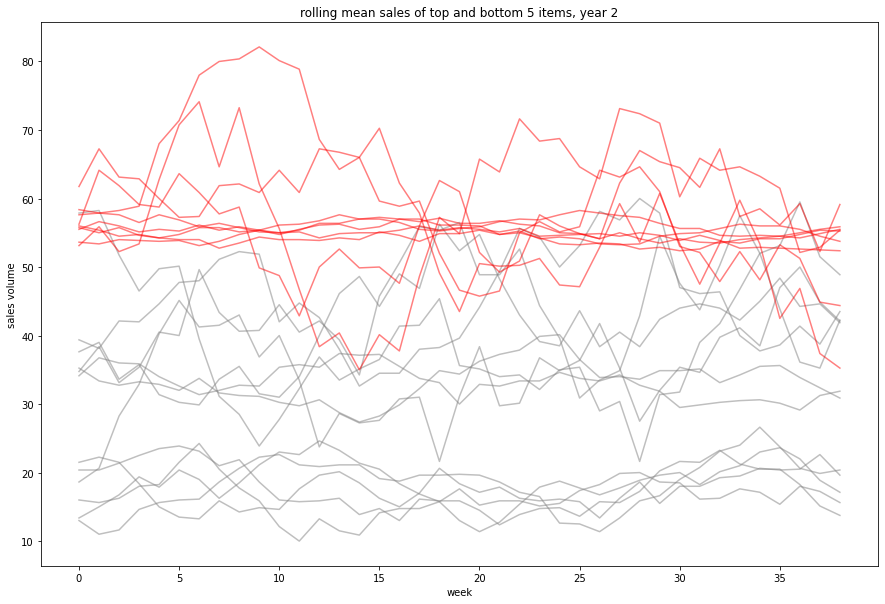

In [562]:
bottom_rolling_means = df_clean[df_clean.sku.isin(bottom_5)][weeks[52:98]].rolling(8, axis=1).mean().dropna(axis=1).values
top_rolling_means = df_clean[df_clean.sku.isin(top_5)][weeks[52:98]].rolling(8, axis=1).mean().dropna(axis=1).values

fig, ax = plt.subplots(figsize=(15,10))

for n, row in enumerate(bottom_rolling_means):
    plt.plot(range(len(row)), row, color='gray', alpha=.5)
    
for n, row in enumerate(top_rolling_means):
    plt.plot(range(len(row)), row, color='red', alpha=.5)
    
plt.title('rolling mean sales of top and bottom 5 items, year 2')
plt.ylabel('sales volume')
plt.xlabel('week')
plt.show()

#### Let's look at how SKUs are ranked by sales and which stores carry which SKUs

In [563]:
sku_count = pd.pivot_table(df_clean_yr2_no_hol[['sku', 'store', 'item_price']], index='sku', columns='store', aggfunc='count').reset_index()
sku_count = sku_count.reset_index(drop=True).set_index('sku')
sku_count

item_price                            
store     store1 store2 store3 store4 store5
sku                                         
1            1.0    1.0    1.0    1.0    1.0
2            1.0    1.0    NaN    NaN    NaN
3            1.0    1.0    1.0    NaN    NaN
4            1.0    1.0    1.0    NaN    1.0
5            1.0    1.0    NaN    NaN    NaN
...          ...    ...    ...    ...    ...
2490         NaN    NaN    NaN    NaN    1.0
2493         NaN    NaN    NaN    NaN    1.0
2495         NaN    NaN    NaN    NaN    1.0
2499         NaN    NaN    NaN    NaN    1.0
2500         NaN    NaN    NaN    NaN    1.0

[1855 rows x 5 columns]

In [564]:
#assign each SKU an explicit ranking based on its total sales over year 2
rankings = df_clean_yr2_no_hol.groupby('sku').mean().sort_values('means', ascending=False).reset_index()[['sku']]
rankings = rankings.reset_index().set_index('sku')
rankings.head()

,index
sku,
925,0
951,1
996,2
873,3
1008,4


In [566]:
#fill in the rankings into the SKU count table
for ind in sku_count.index:
    val = rankings.loc[ind].values
    sku_count.loc[ind].replace(to_replace=[1.0], value=val, inplace=True)
    
sku_count = sku_count.fillna(2000).astype(int)
sku_count = sku_count.loc[rankings.index]

In [567]:
sku_count

item_price                            
store     store1 store2 store3 store4 store5
sku                                         
925            0      0   2000   2000   2000
951            1      1   2000   2000   2000
996            2      2   2000   2000   2000
873            3      3   2000   2000   2000
1008           4   2000   2000   2000   2000
...          ...    ...    ...    ...    ...
789         1850   1850   2000   2000   1850
735         1851   1851   2000   2000   2000
615         1852   1852   2000   2000   2000
577         1853   1853   2000   2000   2000
145         1854   1854   2000   1854   2000

[1855 rows x 5 columns]

Plot these SKU rankings by store. Both the vertical position and the darkness of the color indicate an item's popularity

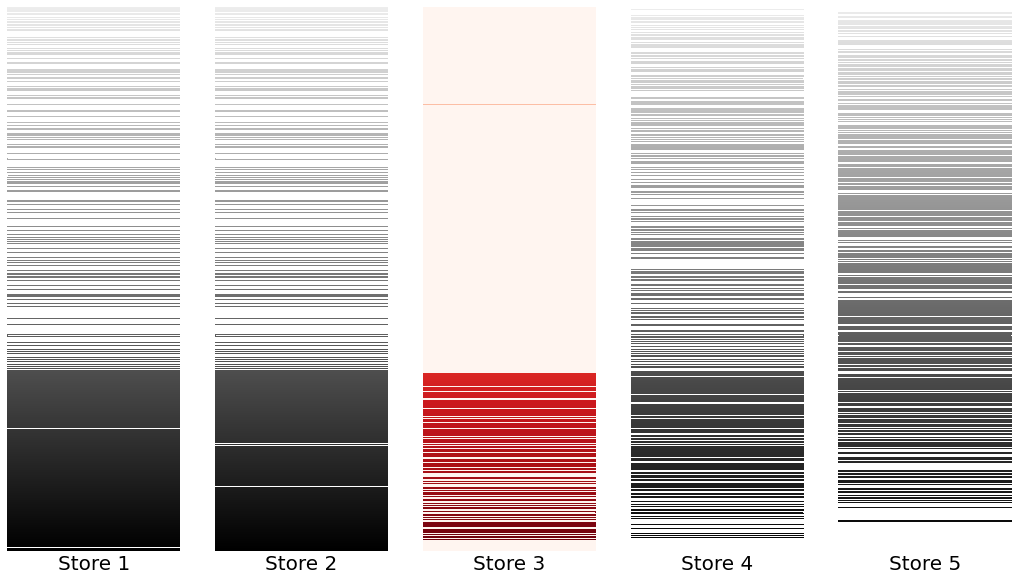

In [555]:
fig, axs = plt.subplots(1,5, figsize=(18,10))
for n in range(5):   
    if n==2:
        cmap='Reds_r'
    else:
        cmap='gray'
    sns.heatmap(sku_count.iloc[:,n].to_frame()[::-1], cmap=cmap, vmin=0,
                cbar=False, ax=axs[n], xticklabels=False, yticklabels=False, )
    axs[n].set_xlabel('Store {}'.format(n+1), fontsize=20)
    axs[n].set_ylabel('')
    
plt.show()

Just curious what this data would look like plotted against each other. Nothing interesting came from it.

In [401]:
df_clean_yr2_no_hol.groupby('sku').mean()[['means', 'item_price']]

,means,item_price
sku,,
1,44.897826,39.333333
2,43.978261,51.500000
3,48.423913,84.333333
4,49.521739,51.250000
5,35.934783,69.000000
...,...,...
2490,35.485507,47.000000
2493,35.239130,10.000000
2495,34.826087,71.000000


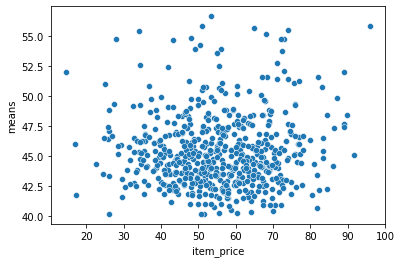

In [405]:
sns.scatterplot(data=scatter_df[scatter_df.means>40],
                x='item_price', 
                y='means'
                   )
plt.show()

#### Looking at average revenue by SKU

In [411]:
avg_revenue_by_sku = df_clean_yr2_no_hol.groupby('sku').mean()[['item_price', 'means']].reset_index()
avg_revenue_by_sku['avg_revenue'] = avg_revenue_by_sku['item_price']*avg_revenue_by_sku['means']
avg_revenue_by_sku

,sku,item_price,means,avg_revenue
0,1,39.333333,44.897826,1765.981159
1,2,51.500000,43.978261,2264.880435
2,3,84.333333,48.423913,4083.750000
3,4,51.250000,49.521739,2537.989130
4,5,69.000000,35.934783,2479.500000
...,...,...,...,...
1850,2490,47.000000,35.485507,1667.818841
1851,2493,10.000000,35.239130,352.391304
1852,2495,71.000000,34.826087,2472.652174
1853,2499,82.000000,34.934783,2864.652174


In [437]:
top_50_revenue = avg_revenue_by_sku.sort_values('avg_revenue', ascending=False)[:50].sku.values

In [444]:
df_clean_yr2_no_hol[df_clean_yr2_no_hol.sku.isin(top_50_revenue)][['store', 'sku', 'item_price']]

,store,sku,item_price
2,store1,3,93.0
13,store1,14,41.0
60,store1,61,91.0
115,store1,116,96.0
149,store1,150,98.0
...,...,...,...
733,store5,1583,99.0
784,store5,1721,99.0
800,store5,1743,99.0
874,store5,1918,99.0


In [498]:
#creating SKU rankings table for revenue this time
revenue_rankings = avg_revenue_by_sku.sort_values('avg_revenue', ascending=False).reset_index()[['sku']]
revenue_rankings = revenue_rankings.reset_index().set_index('sku')

In [499]:
revenue_rankings

,index
sku,
996,0
913,1
305,2
933,3
969,4
...,...
2138,1850
2493,1851
1522,1852


In [487]:
revenue_count = pd.pivot_table(df_clean_yr2_no_hol[['sku', 'store', 'item_price']], index='sku', columns='store', aggfunc='count')
revenue_count = revenue_count.T.reset_index(drop=True).rename(index={0: "store1", 1:"store2", 2:"store3", 3:"store4", 4:"store5"})

In [492]:
revenue_count.T

,store1,store2,store3,store4,store5
sku,,,,,
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN
3,1.0,1.0,1.0,NaN,NaN
4,1.0,1.0,1.0,NaN,1.0
5,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...
2490,NaN,NaN,NaN,NaN,1.0
2493,NaN,NaN,NaN,NaN,1.0
2495,NaN,NaN,NaN,NaN,1.0


In [502]:
for ind in revenue_count.columns:
    val = revenue_rankings.loc[ind].values
    revenue_count.loc[:,ind].replace(to_replace=[1.0], value=val, inplace=True)

In [511]:
revenue_count = revenue_count.fillna(2000).astype(int).T

In [512]:
revenue_count

,store1,store2,store3,store4,store5
sku,,,,,
1,1240,1240,1240,1240,1240
2,774,774,2000,2000,2000
3,12,12,12,2000,2000
4,552,552,552,2000,552
5,599,599,2000,2000,2000
...,...,...,...,...,...
2490,2000,2000,2000,2000,1338
2493,2000,2000,2000,2000,1851
2495,2000,2000,2000,2000,605


I thought this would be more interesting or useful, but it looks fairly similar to the sales volume plot and is also hard to compare to anything else.

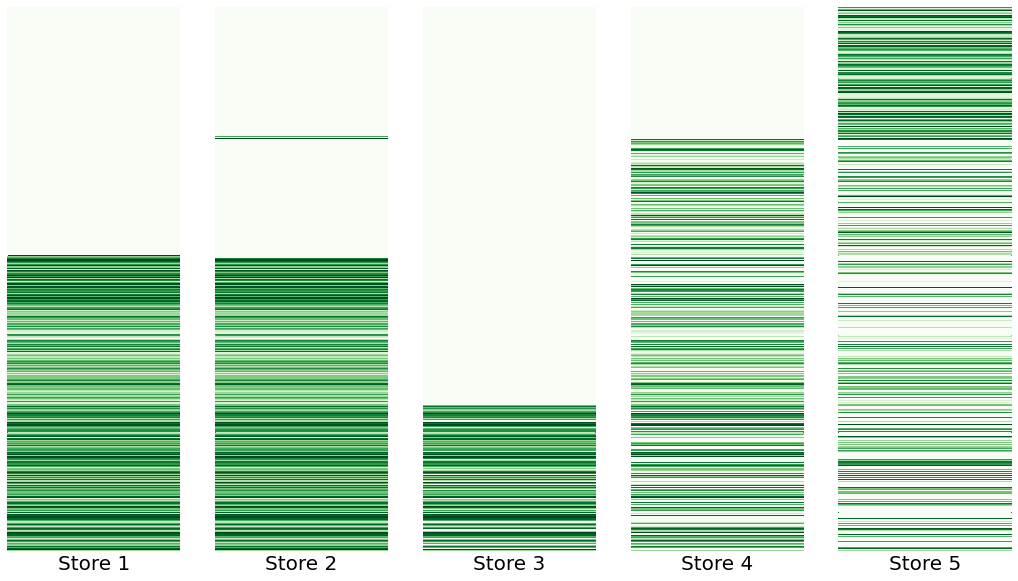

In [514]:
fig, axs = plt.subplots(1,5, figsize=(18,10))
for n in range(5):   
    sns.heatmap(revenue_count.iloc[:,n].to_frame()[::-1], cmap='Greens_r', cbar=False, ax=axs[n], xticklabels=False, yticklabels=False, )
    axs[n].set_xlabel('Store {}'.format(n+1), fontsize=20)
    axs[n].set_ylabel('')
    
plt.show()

#### Plot unique SKUs per store

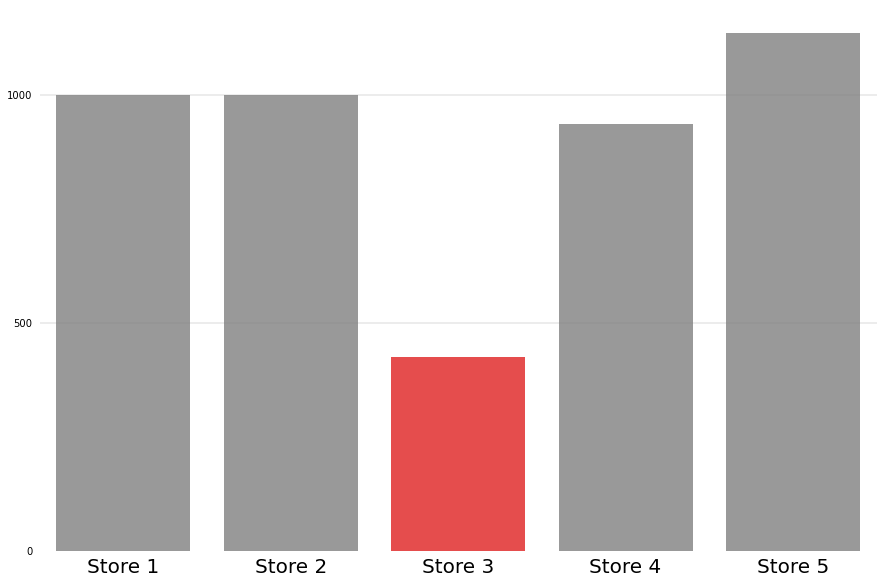

In [560]:
fig, ax = plt.subplots(figsize=(15,10))

ax.axhline(500, color='gray', alpha=.2, zorder=0)
ax.axhline(1000, color='gray', alpha=.2, zorder=0)

sns.countplot(data=df_clean_yr2_no_hol[['store', 'sku']], x='store',
             palette=['gray', 'gray', 'red', 'gray', 'gray'], alpha=.8,ax=ax)

ax.set_yticks([0,500,1000])
# ax.set_xticklabels([0,500,1000], fontsize=20)
ax.set_xticklabels(['Store 1', 'Store 2', 'Store 3', 'Store 4', 'Store 5'] ,fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)



plt.tick_params(axis = "both", which = "both", left=False, bottom=False)
plt.show()

#### Look at median and mean item prices by store

In [552]:
df_clean_yr2_no_hol.groupby('store')[['item_price']].mean()

,item_price
store,
store1,55.919000
store2,53.809000
store3,55.007500
store4,55.438551
store5,55.435960


In [551]:
df_clean_yr2_no_hol.groupby('store')[['item_price']].median()

,item_price
store,
store1,56.000000
store2,53.000000
store3,55.944444
store4,56.000000
store5,55.000000


#### Look at and plot by store revenue

In [361]:
sales_revenue = pd.concat([df_clean[['store', 'sku']], df_clean[weeks[52:98]].apply(lambda x: x*df_clean['item_price'])], axis=1)
sales_revenue

,store,sku,Wk52,Wk53,Wk54,Wk55,Wk56,Wk57,Wk58,Wk59,...,Wk88,Wk89,Wk90,Wk91,Wk92,Wk93,Wk94,Wk95,Wk96,Wk97
0,store1,1,672.000000,576.000000,1152.000000,528.0,720.0,1200.000000,696.0,1080.0,...,720.000000,576.000000,744.000000,1056.000000,648.0,504.000000,744.0,888.0,792.000000,960.000000
1,store1,2,2142.000000,2457.000000,1827.000000,1386.0,2709.0,2898.000000,1638.0,1512.0,...,1323.000000,2835.000000,2394.000000,2961.000000,2457.0,1323.000000,1260.0,1260.0,1575.000000,3150.000000
2,store1,3,1953.000000,1581.000000,2976.000000,3069.0,2604.0,1302.000000,2418.0,3162.0,...,744.000000,2139.000000,1116.000000,93.000000,1023.0,2232.000000,837.0,1581.0,1209.000000,2790.000000
3,store1,4,1200.000000,1968.000000,2064.000000,2112.0,2112.0,1584.000000,1968.0,1968.0,...,1344.000000,1920.000000,1824.000000,1296.000000,2208.0,2352.000000,1488.0,1104.0,1248.000000,1104.000000
4,store1,5,248.000000,868.000000,744.000000,558.0,992.0,2046.000000,1116.0,930.0,...,1054.000000,1178.000000,124.000000,1984.000000,806.0,1116.000000,1178.0,558.0,930.000000,1302.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,store5,2490,1723.333333,1723.333333,1378.666667,1880.0,1974.0,1300.333333,1786.0,1786.0,...,2005.333333,1159.333333,1488.333333,1566.666667,1269.0,1535.333333,1692.0,1786.0,1300.333333,1707.666667
1132,store5,2493,320.000000,290.000000,460.000000,490.0,280.0,410.000000,270.0,430.0,...,240.000000,300.000000,350.000000,270.000000,460.0,210.000000,410.0,460.0,230.000000,390.000000
1133,store5,2495,2130.000000,3124.000000,2627.000000,1917.0,2911.0,2698.000000,2130.0,2698.0,...,1917.000000,1775.000000,3124.000000,2201.000000,3479.0,2201.000000,1988.0,2414.0,2059.000000,1633.000000
1134,store5,2499,3608.000000,1804.000000,4100.000000,3854.0,2460.0,2788.000000,2624.0,3936.0,...,3690.000000,2378.000000,1722.000000,2788.000000,2542.0,3198.000000,2050.0,3116.0,3116.000000,3690.000000


In [364]:
by_store_rev = sales_revenue.drop(columns='sku').groupby('store').mean()
by_store_rev

,Wk52,Wk53,Wk54,Wk55,Wk56,Wk57,Wk58,Wk59,Wk60,Wk61,...,Wk88,Wk89,Wk90,Wk91,Wk92,Wk93,Wk94,Wk95,Wk96,Wk97
store,,,,,,,,,,,,,,,,,,,,,
store1,1371.101000,1390.902000,1398.886000,1369.814000,1396.181000,1385.620000,1396.855000,1407.203000,1388.569000,1379.171000,...,1331.356000,1381.481000,1358.243000,1380.432000,1361.279000,1384.752000,1382.268000,1384.096000,1362.241000,1337.060000
store2,2819.168000,2573.677000,2658.035000,2603.959000,2643.829000,2645.250000,2680.212000,2612.401000,2656.415000,2798.870000,...,2652.714000,2642.957000,2724.292000,2675.140000,2718.718000,2691.493000,2666.533000,2651.721000,2596.212000,2606.344000
store3,4088.111397,4096.104918,4151.035432,4101.729720,4193.429627,4104.054647,4109.165397,4117.468148,4101.021423,4096.768787,...,4142.148134,4094.238117,4139.374095,4098.848147,4147.839748,4132.074613,4080.179505,4119.263810,4157.600039,4108.820193
store4,1936.150863,1949.371458,1944.253629,1937.103518,1936.499745,1951.074917,1912.716976,1928.290271,1947.638542,1933.872413,...,1951.093425,1908.218833,1940.160956,1962.681284,1962.138741,1933.564533,1944.127558,1942.238590,1947.336052,1908.774699
store5,1937.827563,1935.759615,1959.547380,1925.039983,1951.451918,1929.589453,1934.491344,1968.724489,1960.189070,1934.234671,...,1945.098616,1920.483629,1965.509072,1931.711681,1935.063082,1922.513142,1937.463813,1925.905304,1969.584278,1961.081926


Tried this plot first and it was very ugly.

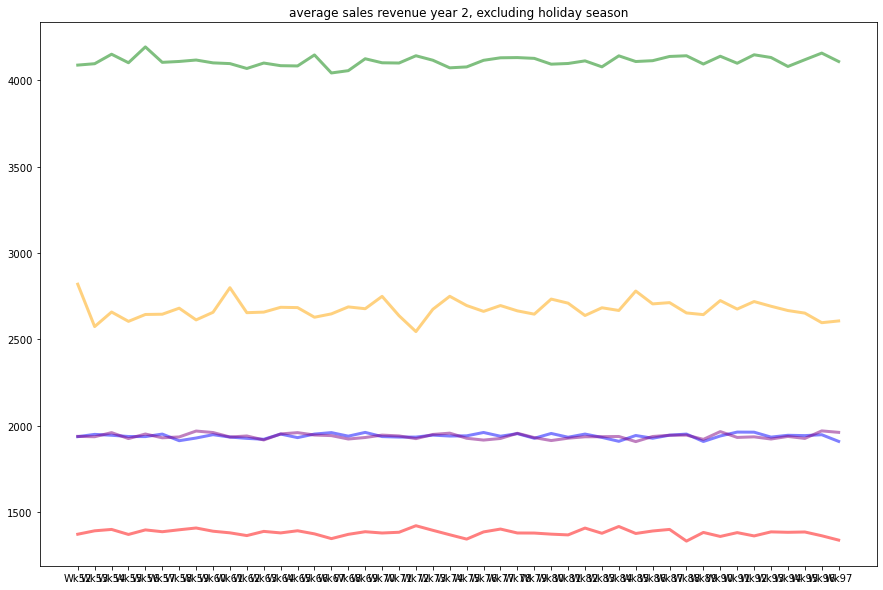

In [417]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(by_store_rev.loc['store1', :], lw=3, alpha=.5, color='red')
plt.plot(by_store_rev.loc['store2', :], lw=3, alpha=.5, color='orange')
plt.plot(by_store_rev.loc['store3', :], lw=3, alpha=.5, color='green')
plt.plot(by_store_rev.loc['store4', :], lw=3, alpha=.5, color='blue')
plt.plot(by_store_rev.loc['store5', :], lw=3, alpha=.5, color='purple')

plt.title('average sales revenue year 2, excluding holiday season')
plt.show()

This seemed a better way to display the revenue data.

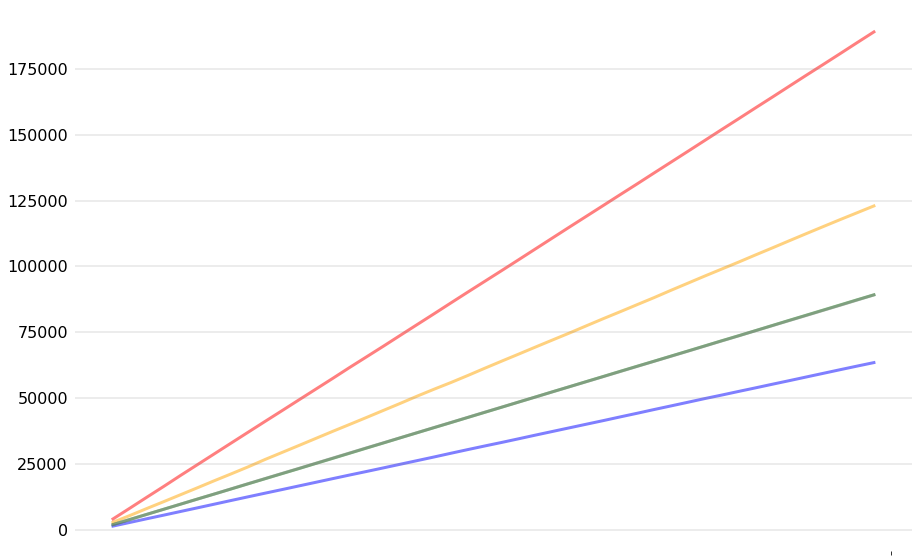

In [432]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(by_store_rev.loc['store1', :].cumsum(), lw=3, alpha=.5, color='blue')
plt.plot(by_store_rev.loc['store2', :].cumsum(), lw=3, alpha=.5, color='orange')
plt.plot(by_store_rev.loc['store3', :].cumsum(), lw=3, alpha=.5, color='red')
plt.plot(by_store_rev.loc['store4', :].cumsum(), lw=3, alpha=.5, color='green')
plt.plot(by_store_rev.loc['store5', :].cumsum(), lw=3, alpha=.5, color='gray')

for num in ax.get_yticks()[1:-1]:
    ax.axhline(num, color='gray', alpha=.2)

plt.yticks(fontsize=16)
plt.xticks('')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.tick_params(axis = "y", which = "both", left=False)


plt.title('')
plt.show()